# Capstone Project: <br>
# Create a Customer Segmentation Report for Arvato Financial Services

### Table of Content

1. Introduction
2. Part 0: Get to Know the Data<br>
    2.1 Import Libraries and Load the Data<br>
        2.1.1 Import Libraries
        2.1.2 Load Demographics Data for general German population
        2.1.3 Load Demographics Data for Customers of a Mail-order Company
        2.1.4 Load Excel file : DIAS Attributes - Values 2017.xlsx
    2.2 Cleaning the Data<br>
        2.2.1 Explore the columns not exist in attributes excel file but exist in azdias
            2.2.1.1 Attributes specified as non-numeric
            2.2.1.2 Attributes specified as numeric
        2.2.2 Explore the common columns exist both in azdias and excel file
            2.2.2.1 Non-numeric specified columns in commons
            2.2.2.2 Numeric specified columns in commons
        2.2.3 Explore whole azdias data, check unkowns
    2.3 Handle Missing Data<br>
        2.3.1 Handle Missing Data in columns<br>
        2.3.2 Handle Missing Data in Rows<br>
        2.3.3 Imputation of Missing Values<br>
    2.4 Handling Outliers<br>
    2.5 Feature Encoding<br>
    2.6 Define a function to clean Customer data<br>
    2.7 Feature Scaling of Azdias and Customer Data<br>
    2.8 Cleanign Train and Test Data<br>
        2.8.1 Train Data<br>
        2.8.2 Test Data<br>
3. Part 1: Customer Segmentation Report <br>
    3.1 Perform PCA - Principal Component Analysis<br>
    3.2 Interpretation of Principal Components<br>
    3.3 Perform K-Means Clustering
    <br>
    
4. Part 2: Supervised Learning Model<br>
    4.1 Import Libraries and Load Datas<br>
    4.2 Feature Scaling of Train Data<br>
    4.3 Building Classification Model<br>
    4.4 Hyperparameter tuning of Gradient Boosting Classifer
    <br>
    
5. Part 3: Kaggle Competition<br>
    5.1 Feature Scaling of Test Data<br>
    5.2 Getting Predictions from Tuned Model


## 1. Introduction

In this project, you will analyze demographics data for customers of a mail-order sales company in Germany, comparing it against demographics information for the general population. You'll use unsupervised learning techniques to perform customer segmentation, identifying the parts of the population that best describe the core customer base of the company. Then, you'll apply what you've learned on a third dataset with demographics information for targets of a marketing campaign for the company, and use a model to predict which individuals are most likely to convert into becoming customers for the company. The data that you will use has been provided by our partners at Bertelsmann Arvato Analytics, and represents a real-life data science task.

If you completed the first term of this program, you will be familiar with the first part of this project, from the unsupervised learning project. The versions of those two datasets used in this project will include many more features and has not been pre-cleaned. You are also free to choose whatever approach you'd like to analyzing the data rather than follow pre-determined steps. In your work on this project, make sure that you carefully document your steps and decisions, since your main deliverable for this project will be a blog post reporting your findings.

## 2. Part 0: Get to Know the Data

There are four data files associated with this project:

- `Udacity_AZDIAS_052018.csv`: Demographics data for the general population of Germany; 891 211 persons (rows) x 366 features (columns).
- `Udacity_CUSTOMERS_052018.csv`: Demographics data for customers of a mail-order company; 191 652 persons (rows) x 369 features (columns).
- `Udacity_MAILOUT_052018_TRAIN.csv`: Demographics data for individuals who were targets of a marketing campaign; 42 982 persons (rows) x 367 (columns).
- `Udacity_MAILOUT_052018_TEST.csv`: Demographics data for individuals who were targets of a marketing campaign; 42 833 persons (rows) x 366 (columns).

Each row of the demographics files represents a single person, but also includes information outside of individuals, including information about their household, building, and neighborhood. Use the information from the first two files to figure out how customers ("CUSTOMERS") are similar to or differ from the general population at large ("AZDIAS"), then use your analysis to make predictions on the other two files ("MAILOUT"), predicting which recipients are most likely to become a customer for the mail-order company.

The "CUSTOMERS" file contains three extra columns ('CUSTOMER_GROUP', 'ONLINE_PURCHASE', and 'PRODUCT_GROUP'), which provide broad information about the customers depicted in the file. The original "MAILOUT" file included one additional column, "RESPONSE", which indicated whether or not each recipient became a customer of the company. For the "TRAIN" subset, this column has been retained, but in the "TEST" subset it has been removed; it is against that withheld column that your final predictions will be assessed in the Kaggle competition.

Otherwise, all of the remaining columns are the same between the three data files. For more information about the columns depicted in the files, you can refer to two Excel spreadsheets provided in the workspace. [One of them](./DIAS Information Levels - Attributes 2017.xlsx) is a top-level list of attributes and descriptions, organized by informational category. [The other](./DIAS Attributes - Values 2017.xlsx) is a detailed mapping of data values for each feature in alphabetical order.

In the below cell, we've provided some initial code to load in the first two datasets. Note for all of the `.csv` data files in this project that they're semicolon (`;`) delimited, so an additional argument in the [`read_csv()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) call has been included to read in the data properly. Also, considering the size of the datasets, it may take some time for them to load completely.

You'll notice when the data is loaded in that a warning message will immediately pop up. Before you really start digging into the modeling and analysis, you're going to need to perform some cleaning. Take some time to browse the structure of the data and look over the informational spreadsheets to understand the data values. Make some decisions on which features to keep, which features to drop, and if any revisions need to be made on data formats. It'll be a good idea to create a function with pre-processing steps, since you'll need to clean all of the datasets before you work with them.

### 2.1 Import Libraries and Load the Data

#### 2.1.1 Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pickle

from collections import Counter
from sklearn.preprocessing import StandardScaler


#### 2.1.2 Load Demographics Data for general German population

In [3]:
# Read the data of Udacity_AZDIAS_052018.csv : Demographics data for the general population of Germany
azdias = pd.read_csv(r"U:\arvato_data\Udacity_AZDIAS_052018.csv",delimiter=";")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (18,19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Above data type warning occured during file reading.<br>
There are mixed type data under Columns 18 and 19; i want to look at the unique values under the columns:

In [4]:
print("column 18 :",azdias.columns[18])
#Unique values
azdias[azdias.columns[18]].unique()

column 18 : CAMEO_DEUG_2015


array([nan, 8.0, 4.0, 2.0, 6.0, 1.0, 9.0, 5.0, 7.0, 3.0, '4', '3', '7',
       '2', '8', '9', '6', '5', '1', 'X'], dtype=object)

In [5]:
print("column 19 :",azdias.columns[19])
# Unique values
azdias[azdias.columns[19]].unique()

column 19 : CAMEO_INTL_2015


array([nan, 51.0, 24.0, 12.0, 43.0, 54.0, 22.0, 14.0, 13.0, 15.0, 33.0,
       41.0, 34.0, 55.0, 25.0, 23.0, 31.0, 52.0, 35.0, 45.0, 44.0, 32.0,
       '22', '24', '41', '12', '54', '51', '44', '35', '23', '25', '14',
       '34', '52', '55', '31', '32', '15', '13', '43', '33', '45', 'XX'],
      dtype=object)

There are numerical and string values mixed under the columns.<br>
I will specify the datatypes as str for those type while reading the file.

In [5]:
azdias = pd.read_csv(r"U:\arvato_data\Udacity_AZDIAS_052018.csv", 
                     delimiter=";",
                    dtype = {"CAMEO_DEUG_2015": "str","CAMEO_INTL_2015": "str" })

In [6]:
# Show head
azdias.head()

,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,...,VHN,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB
0,910215,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,1,2
1,910220,-1,9.0,0.0,NaN,NaN,NaN,NaN,21.0,11.0,...,4.0,8.0,11.0,10.0,3.0,9.0,4.0,5,2,1
2,910225,-1,9.0,17.0,NaN,NaN,NaN,NaN,17.0,10.0,...,2.0,9.0,9.0,6.0,3.0,9.0,2.0,5,2,3
3,910226,2,1.0,13.0,NaN,NaN,NaN,NaN,13.0,1.0,...,0.0,7.0,10.0,11.0,NaN,9.0,7.0,3,2,4
4,910241,-1,1.0,20.0,NaN,NaN,NaN,NaN,14.0,3.0,...,2.0,3.0,5.0,4.0,2.0,9.0,3.0,4,1,3


In [7]:
print("Count of rows in azdias :", azdias.shape[0])
print("Count of columns in azdias :", azdias.shape[1])

Count of rows in azdias : 891221
Count of columns in azdias : 366


#### 2.1.3 Load Demographics Data for Customers of a Mail-order Company

In [8]:
# Read the data of Udacity_CUSTOMERS_052018.csv : Demographics data for customers of a mail-order company
customers = pd.read_csv(r"U:\arvato_data\Udacity_CUSTOMERS_052018.csv", 
                     delimiter=";",
                    dtype = {"CAMEO_DEUG_2015": "str","CAMEO_INTL_2015": "str" })

In [9]:
# Show head
customers.head()

,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,...,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,PRODUCT_GROUP,CUSTOMER_GROUP,ONLINE_PURCHASE,ANREDE_KZ,ALTERSKATEGORIE_GROB
0,9626,2,1.0,10.0,NaN,NaN,NaN,NaN,10.0,1.0,...,2.0,6.0,9.0,7.0,3,COSMETIC_AND_FOOD,MULTI_BUYER,0,1,4
1,9628,-1,9.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,0.0,9.0,NaN,3,FOOD,SINGLE_BUYER,0,1,4
2,143872,-1,1.0,6.0,NaN,NaN,NaN,NaN,0.0,1.0,...,11.0,6.0,9.0,2.0,3,COSMETIC_AND_FOOD,MULTI_BUYER,0,2,4
3,143873,1,1.0,8.0,NaN,NaN,NaN,NaN,8.0,0.0,...,2.0,NaN,9.0,7.0,1,COSMETIC,MULTI_BUYER,0,1,4
4,143874,-1,1.0,20.0,NaN,NaN,NaN,NaN,14.0,7.0,...,4.0,2.0,9.0,3.0,1,FOOD,MULTI_BUYER,0,1,3


In [10]:
print("Count of rows in customers :", customers.shape[0])
print("Count of columns in customers :", customers.shape[1])

Count of rows in customers : 191652
Count of columns in customers : 369


In [11]:
# Columns that exist in customers but not exist in azdias
azdias_col = azdias.columns.values.tolist()
customers_col = customers.columns.values.tolist()
list(set.difference(set(customers_col), set(azdias_col)))

['PRODUCT_GROUP', 'CUSTOMER_GROUP', 'ONLINE_PURCHASE']

I will drop those three columns from "customers" data:

In [12]:
customers.drop(list(set.difference(set(customers_col), set(azdias_col))), axis = 1, inplace = True)

#### 2.1.4 Load Excel file : DIAS Attributes - Values 2017.xlsx

Originally this file did not contain "Dtype" column.<br>
I manually went through all file and define if the column has categorical, ordinal or numerical data.<br>
I will use those info afterward when it is required.                                                       

In [13]:
attributes = pd.read_excel(r"U:\arvato_data\excel\DIAS Attributes - Values 2017.xlsx",
                          header = 0, index_col=None)
attributes.head()

,Attribute,Description,Dtype,Value,Meaning
0,AGER_TYP,best-ager typology,categorical,-1,unknown
1,NaN,NaN,NaN,0,no classification possible
2,NaN,NaN,NaN,1,passive elderly
3,NaN,NaN,NaN,2,cultural elderly
4,NaN,NaN,NaN,3,experience-driven elderly


I will use frontfill method to fill the NaN's in columns "Attribute", "Description", "Dtype".

In [14]:
for col in ["Attribute", "Description","Dtype"]:
    attributes[col] = attributes[col].fillna(method='ffill')
    
attributes.head()

,Attribute,Description,Dtype,Value,Meaning
0,AGER_TYP,best-ager typology,categorical,-1,unknown
1,AGER_TYP,best-ager typology,categorical,0,no classification possible
2,AGER_TYP,best-ager typology,categorical,1,passive elderly
3,AGER_TYP,best-ager typology,categorical,2,cultural elderly
4,AGER_TYP,best-ager typology,categorical,3,experience-driven elderly


I will check if the attributes are same in excel file and in azdias file:

In [15]:
# Attribute lists
attributes_excel = attributes.Attribute.unique().tolist()
# "azdias_col" was previosuly defined above.

# Attributes that exist in excel file but not in azdias
not_in_azdias = list(set.difference(set(attributes_excel), set(azdias_col)))

# Attributes that exist in azdias but not in excel file
not_in_excel = list(set.difference(set(azdias_col), set(attributes_excel)))

# Attributes that exist both in excel and azdias
common_atr = list(set.intersection(set(azdias_col), set(attributes_excel)))

# Sort lists
attributes_excel.sort()
not_in_azdias.sort()
not_in_excel.sort()
common_atr.sort()

print("{} qty attributes in excel file but not in azdias".format(len(not_in_azdias)))
print("{} qty attributes in azdias but not in excel file".format(len(not_in_excel)))
print("{} qty attributes common in azdias and excel file".format(len(common_atr)))

42 qty attributes in excel file but not in azdias
94 qty attributes in azdias but not in excel file
272 qty attributes common in azdias and excel file


I will drop the attributes that does not exist in azdias, from excel file :

In [16]:
# Drop attributes not exist in azdias
attributes.drop(labels = attributes[attributes.Attribute.isin(not_in_azdias)].index, axis = 0, inplace = True)

Later, I will explore the 94 attributes that exist in azdias, but not exist in excel file;<br>
to figure out the datatypes.                                                  

### 2.2 Cleaning the Data

Cleaning steps:<br>

1.Explore the columns not exist in attributes excel file but exist in azdias:I will decide if i should keep the columns or not, also decide the data type if it is categorical, ordinal or numerical. In addition, conduct cleaning operations.

2.Explore the columns exist both in azdias and excel file.

3.Explore the whole columns in data, check the unkowns

### 2.2.1 Explore the columns not exist in attributes excel file but exist in azdias

There are 94 columns on which no info supplied in attributes excel file.<br>
First i will look at columns specified as non-numeric; then explore the numeric ones.  

#### 2.2.1.1 Attributes specified as non-numeric:

In [17]:
# Columns that are specified as non_numeric 
azdias[azdias[not_in_excel].select_dtypes(exclude=np.number).columns.tolist()].head()

,CAMEO_INTL_2015,D19_LETZTER_KAUF_BRANCHE,EINGEFUEGT_AM
0,NaN,NaN,NaN
1,51,NaN,1992-02-10 00:00:00
2,24,D19_UNBEKANNT,1992-02-12 00:00:00
3,12,D19_UNBEKANNT,1997-04-21 00:00:00
4,43,D19_SCHUHE,1992-02-12 00:00:00


I will convert EINGEFUEGT_AM to date time object and later dig into other two columns:

In [18]:
# Converting to date time object
azdias["EINGEFUEGT_AM"] =  pd.to_datetime(azdias["EINGEFUEGT_AM"], infer_datetime_format=True)

In [19]:
# Create column "YEAR_ADDED", "MONTH_ADDEDD","DAY_ADDED" columns; i will drop "EINGEFUEGT_AM" later
azdias["YEAR_ADDED"] = azdias["EINGEFUEGT_AM"].dt.year
azdias["MONTH_ADDED"] = azdias["EINGEFUEGT_AM"].dt.month
azdias["DAY_ADDED"] = azdias["EINGEFUEGT_AM"].dt.day

I will define a function to plot the distributions of columns:

In [20]:
def plot_feature(col_name, df):
    """
        input : col_name --> column name 
                df --> data frame
        output : bar plot and value count of col_name
    """
    # geting feature
    var = df[col_name]
    # count number of variable
    varValue = var.value_counts()
    # visualize
    plt.figure(figsize = (9,2))
    plt.bar(varValue.index, varValue, edgecolor = "black")
    plt.xticks(varValue.index, varValue.index.values, rotation = 90, fontsize = 10)
    plt.ylabel("Frequency")
    plt.title(col_name)
    plt.show()
    #print("{}: \n {}". format(col_name, varValue))

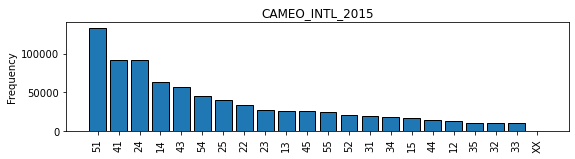

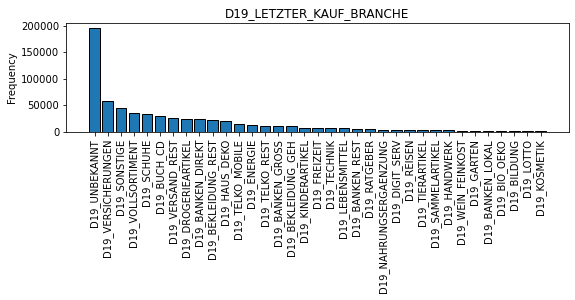

In [21]:
for col in ["CAMEO_INTL_2015", "D19_LETZTER_KAUF_BRANCHE"]:
    plot_feature(col, azdias)

I will add the column names and my dtype assumptions to attributes data frame:

In [22]:
for a,b in [("CAMEO_INTL_2015","categorical"),
            ("D19_LETZTER_KAUF_BRANCHE","categorical"),
            ("YEAR_ADDED","numerical"),
            ("MONTH_ADDED","numerical"),
            ("DAY_ADDED","numerical")]:
    
    attributes = attributes.append({"Attribute": a, "Dtype": b}, ignore_index=True)  

I will replace "XX" with np.NaN in CAMEO_INTL_2015:

In [23]:
# Replace "XX" with NaN
azdias.CAMEO_INTL_2015 = azdias.CAMEO_INTL_2015.replace("XX", np.NaN)

In [24]:
# Convert data type to integer of CAMEO_INTL_2015    
azdias["CAMEO_INTL_2015"] = azdias["CAMEO_INTL_2015"].astype(float)    

#### 2.2.1.2 Attributes specified as numeric:

In [25]:
# Columns that are specified as numeric 

azdias[azdias[not_in_excel].select_dtypes(include=np.number).columns.tolist()].head()

,AKT_DAT_KL,ALTERSKATEGORIE_FEIN,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ANZ_KINDER,ANZ_STATISTISCHE_HAUSHALTE,ARBEIT,CAMEO_INTL_2015,...,STRUKTURTYP,UMFELD_ALT,UMFELD_JUNG,UNGLEICHENN_FLAG,VERDICHTUNGSRAUM,VHA,VHN,VK_DHT4A,VK_DISTANZ,VK_ZG11
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9.0,21.0,NaN,NaN,NaN,NaN,0.0,12.0,3.0,51.0,...,2.0,3.0,3.0,1.0,0.0,0.0,4.0,8.0,11.0,10.0
2,9.0,17.0,NaN,NaN,NaN,NaN,0.0,7.0,3.0,24.0,...,3.0,2.0,5.0,0.0,1.0,0.0,2.0,9.0,9.0,6.0
3,1.0,13.0,NaN,NaN,NaN,NaN,0.0,2.0,2.0,12.0,...,1.0,4.0,5.0,0.0,0.0,1.0,0.0,7.0,10.0,11.0
4,1.0,14.0,NaN,NaN,NaN,NaN,0.0,3.0,4.0,43.0,...,3.0,4.0,3.0,0.0,1.0,0.0,2.0,3.0,5.0,4.0


In [26]:
# List of numeric specified attributes 
atr_list = azdias[not_in_excel].select_dtypes(include=np.number).columns.tolist()

# Remove LNR from list
atr_list.remove("LNR")

In [27]:
#for col in atr_list:
    #plot_feature(col, azdias)

I will create a list by manually adding datatypes of attributes.<br>
Those are my assumptions based on attributes names, types of similar attributes given in excel file and <br>
above graphs.

In [28]:
mapped_list = [('VERDICHTUNGSRAUM','categorical'), ('D19_SOZIALES','ordinal'), ('D19_VOLLSORTIMENT','ordinal'),
 ('D19_KINDERARTIKEL','ordinal'), ('D19_WEIN_FEINKOST','ordinal'), ('ALTERSKATEGORIE_FEIN','ordinal'),
 ('D19_VERSI_DATUM','ordinal'), ('D19_BANKEN_GROSS','ordinal'), ('RT_SCHNAEPPCHEN','categorical'),
 ('D19_VERSICHERUNGEN','ordinal'), ('CJT_TYP_4','categorical'), ('D19_TELKO_REST','ordinal'),
 ('D19_BUCH_CD','ordinal'), ('STRUKTURTYP','categorical'), ('D19_KOSMETIK','ordinal'),
 ('KBA13_KMH_210','ordinal'),('D19_NAHRUNGSERGAENZUNG','ordinal') ,('VHA','ordinal'),
 ('D19_BILDUNG','ordinal'), ('KBA13_ANTG4','ordinal'), ('D19_GARTEN','ordinal'),
 ('KK_KUNDENTYP','categorical'), ('D19_FREIZEIT','ordinal'), ('D19_BEKLEIDUNG_GEH','ordinal'),
 ('RT_UEBERGROESSE','categorical'), ('CJT_TYP_3','categorical'), ('D19_TELKO_ONLINE_QUOTE_12','ordinal'),
 ('CJT_TYP_6','categorical'), ('D19_SCHUHE','ordinal'), ('D19_BEKLEIDUNG_REST','ordinal'),
 ('ARBEIT','ordinal'), ('ALTER_KIND2','ordinal'), ('D19_TIERARTIKEL','ordinal'),
 ('SOHO_KZ','categorical'), ('D19_VERSAND_REST','ordinal'), ('KBA13_ANTG1','ordinal'),
 ('D19_BANKEN_LOKAL','ordinal'), ('D19_REISEN','ordinal'), ('KBA13_BAUMAX','ordinal'),
 ('ANZ_KINDER','numerical'), ('UNGLEICHENN_FLAG','categorical'), ('CJT_TYP_2','categorical'),
 ('RT_KEIN_ANREIZ','ordinal'), ('D19_VERSI_ONLINE_QUOTE_12','ordinal'), ('D19_VERSI_OFFLINE_DATUM','ordinal'),
 ('ALTER_KIND4','categorical'), ('DSL_FLAG','categorical'), ('EINGEZOGENAM_HH_JAHR','numerical'),
 ('VK_ZG11','categorical'), ('D19_BANKEN_REST','ordinal'), ('D19_KONSUMTYP_MAX','ordinal'),
 ('EXTSEL992','numerical'), ('CJT_TYP_1','categorical'), ('ALTER_KIND1','categorical'),
 ('D19_TELKO_MOBILE','ordinal'), ('D19_HANDWERK','ordinal'), ('VK_DHT4A','categorical'),
 ('ALTER_KIND3','categorical'), ('D19_VERSI_ONLINE_DATUM','ordinal'), ('CJT_TYP_5','categorical'),
 ('KBA13_ANTG3','ordinal'), ('MOBI_RASTER','categorical'), ('KBA13_ANTG2','ordinal'),
 ('D19_HAUS_DEKO','ordinal'), ('D19_LOTTO','ordinal'), ('GEMEINDETYP','categorical'),
 ('KOMBIALTER','categorical'), ('KBA13_CCM_1401_2500','ordinal'), ('ANZ_STATISTISCHE_HAUSHALTE','numerical'),
 ('AKT_DAT_KL','categorical'), ('KBA13_GBZ','ordinal'), ('VK_DISTANZ','ordinal'),
 ('CJT_KATALOGNUTZER','categorical'), ('D19_DROGERIEARTIKEL','ordinal'), ('D19_TECHNIK','ordinal'),
 ('D19_DIGIT_SERV','ordinal'), ('VHN','categorical'), ('KONSUMZELLE','categorical'),
 ('UMFELD_ALT','categorical'), ('UMFELD_JUNG','categorical'), ('HH_DELTA_FLAG','categorical'),
 ('D19_RATGEBER','ordinal'), ('D19_SAMMELARTIKEL','ordinal'), ('D19_BIO_OEKO','ordinal'),
 ('KBA13_HHZ','ordinal'), ('FIRMENDICHTE','categorical'), ('D19_SONSTIGE','ordinal'),
 ('D19_ENERGIE','ordinal'), ('D19_LEBENSMITTEL','ordinal'), ('D19_BANKEN_DIREKT','ordinal'),
 ('LNR','numerical')]

In [29]:
# Append attributes and dtypes to attributes dataframe
for a,b in mapped_list:
    attributes = attributes.append({"Attribute": a, "Dtype": b}, ignore_index=True)  

In [30]:
# Data types for all azdias dataframe
data_types = attributes[["Attribute","Dtype"]].drop_duplicates()

# Create list of columns according to data types
categoricals = data_types[data_types.Dtype == "categorical"].Attribute.values.tolist()
ordinals = data_types[data_types.Dtype == "ordinal"].Attribute.values.tolist()
numericals = data_types[data_types.Dtype == "numerical"].Attribute.values.tolist()

# Check 
print(len(categoricals)+len(ordinals)+len(numericals))

368


### 2.2.2 Explore the common columns exist both in azdias and excel file

In [31]:
# Prewiew common columns in azdias
azdias[common_atr].head()

,AGER_TYP,ALTERSKATEGORIE_GROB,ALTER_HH,ANREDE_KZ,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_PERSONEN,ANZ_TITEL,BALLRAUM,CAMEO_DEUG_2015,...,SEMIO_SOZ,SEMIO_TRADV,SEMIO_VERT,SHOPPER_TYP,TITEL_KZ,VERS_TYP,WOHNDAUER_2008,WOHNLAGE,W_KEIT_KIND_HH,ZABEOTYP
0,-1,2,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,...,2,3,1,-1,NaN,-1,NaN,NaN,NaN,3
1,-1,1,0.0,2,11.0,0.0,2.0,0.0,6.0,8,...,5,6,1,3,0.0,2,9.0,4.0,3.0,5
2,-1,3,17.0,2,10.0,0.0,1.0,0.0,2.0,4,...,4,3,4,2,0.0,1,9.0,2.0,3.0,5
3,2,4,13.0,2,1.0,0.0,0.0,0.0,4.0,2,...,5,4,4,1,0.0,1,9.0,7.0,NaN,3
4,-1,3,20.0,1,3.0,0.0,4.0,0.0,2.0,6,...,6,2,7,2,0.0,2,9.0,3.0,2.0,4


#### 2.2.2.1 Non-numeric specified columns in commons

In [32]:
# Non-numeric specified columns in common colums in azdias
azdias[common_atr].select_dtypes(exclude = np.number).head()

,CAMEO_DEUG_2015,CAMEO_DEU_2015,OST_WEST_KZ
0,NaN,NaN,NaN
1,8,8A,W
2,4,4C,W
3,2,2A,W
4,6,6B,W


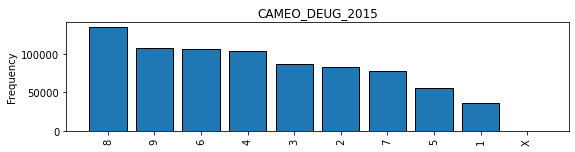

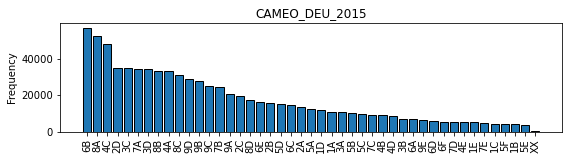

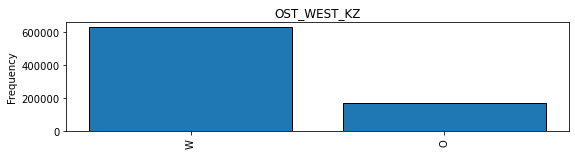

In [33]:
# Plot non-numerics in commons
for col in ["CAMEO_DEUG_2015","CAMEO_DEU_2015","OST_WEST_KZ"]:
    plot_feature(col, azdias)

In [34]:
# Replace "X" and "XX" with NaN in columns "CAMEO_DEUG_2015","CAMEO_DEU_2015"
azdias.CAMEO_DEUG_2015 = azdias.CAMEO_DEUG_2015.replace("X", np.NaN)
azdias.CAMEO_DEU_2015 = azdias.CAMEO_DEU_2015.replace("XX", np.NaN)

In [35]:
# Conver data type
azdias.CAMEO_DEUG_2015 = azdias.CAMEO_DEUG_2015.astype(float)

In [36]:
# Replace "W" and "O" with 0 and 1.
azdias.OST_WEST_KZ = azdias.OST_WEST_KZ.replace("W", 0).replace("O",1)

In [37]:
# Replace values with numbers in CAMEO_DEU_2015

# Create dictionary to store values
map_dict = dict()
k = 0
for each in azdias.CAMEO_DEU_2015.value_counts().index.sort_values().tolist():
    map_dict[each]= k
    k = k + 1

# Replace    
azdias["CAMEO_DEU_2015"] = azdias["CAMEO_DEU_2015"].replace(map_dict)    

#### 2.2.2.2 Numeric specified columns in commons

In [38]:
# Numeric specified columns in common colums in azdias
azdias[common_atr].select_dtypes(include = np.number).head()

,AGER_TYP,ALTERSKATEGORIE_GROB,ALTER_HH,ANREDE_KZ,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_PERSONEN,ANZ_TITEL,BALLRAUM,CAMEO_DEUG_2015,...,SEMIO_SOZ,SEMIO_TRADV,SEMIO_VERT,SHOPPER_TYP,TITEL_KZ,VERS_TYP,WOHNDAUER_2008,WOHNLAGE,W_KEIT_KIND_HH,ZABEOTYP
0,-1,2,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,...,2,3,1,-1,NaN,-1,NaN,NaN,NaN,3
1,-1,1,0.0,2,11.0,0.0,2.0,0.0,6.0,8.0,...,5,6,1,3,0.0,2,9.0,4.0,3.0,5
2,-1,3,17.0,2,10.0,0.0,1.0,0.0,2.0,4.0,...,4,3,4,2,0.0,1,9.0,2.0,3.0,5
3,2,4,13.0,2,1.0,0.0,0.0,0.0,4.0,2.0,...,5,4,4,1,0.0,1,9.0,7.0,NaN,3
4,-1,3,20.0,1,3.0,0.0,4.0,0.0,2.0,6.0,...,6,2,7,2,0.0,2,9.0,3.0,2.0,4


In [39]:
# Plot non-numerics in commons
#for col in azdias[common_atr].select_dtypes(include = np.number).columns.tolist():
    #plot_feature(col, azdias)

### 2.2.3 Explore whole azdias data, check unkowns

From above graphs, we see that some columns have values like -1.<br>
In the exel file, under "Value" column; it is explained that -1 for all columns and 0 for some columns, mean "unknown". Also it shows that, 9 means "unknown" for some columns. I will convert those to NaN.

In [40]:
# Create dataframe includes Attribute, Value, Meaning
meanings = attributes.dropna(axis = 0, subset = ["Meaning"])[["Attribute","Value","Meaning"]]

# Filter datafrane for the rows contains unknowns
unknowns = meanings[meanings.Meaning.str.contains("unknown")|
         meanings.Meaning.str.contains("no classification")|
         meanings.Meaning.str.contains("no transaction")|
         meanings.Meaning.str.contains("no transactions")|
         meanings.Meaning.str.contains("no online")].drop_duplicates()[["Attribute","Value"]]
unknowns.head()

,Attribute,Value
0,AGER_TYP,-1
1,AGER_TYP,0
5,ALTERSKATEGORIE_GROB,"-1, 0"
11,ALTER_HH,0
33,ANREDE_KZ,"-1, 0"


In [41]:
# Loop through azdias dataframe and replace necessary values with NaN

# Loop in attributes that have unknowns
for attribute in unknowns.Attribute.unique():
    # Loop in unkown values
    for value in unknowns[unknowns.Attribute == attribute].Value.values.tolist():
        # get indices
        idx = azdias.loc[:,attribute] == value
        # replace with NaN
        azdias.loc[idx,attribute] = np.NaN          

In [42]:
azdias.head()

,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,...,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB,YEAR_ADDED,MONTH_ADDED,DAY_ADDED
0,910215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.0,1.0,2.0,NaN,NaN,NaN
1,910220,NaN,9.0,NaN,NaN,NaN,NaN,NaN,21.0,11.0,...,10.0,3.0,9.0,4.0,5.0,2.0,1.0,1992.0,2.0,10.0
2,910225,NaN,9.0,17.0,NaN,NaN,NaN,NaN,17.0,10.0,...,6.0,3.0,9.0,2.0,5.0,2.0,3.0,1992.0,2.0,12.0
3,910226,2.0,1.0,13.0,NaN,NaN,NaN,NaN,13.0,1.0,...,11.0,NaN,9.0,7.0,3.0,2.0,4.0,1997.0,4.0,21.0
4,910241,NaN,1.0,20.0,NaN,NaN,NaN,NaN,14.0,3.0,...,4.0,2.0,9.0,3.0,4.0,1.0,3.0,1992.0,2.0,12.0


### 2.3 Handle Missing Data

#### 2.3.1 Handle Missing Data in columns

I will investigate the columns and rows to understand how many or what percentage of missing values they have.

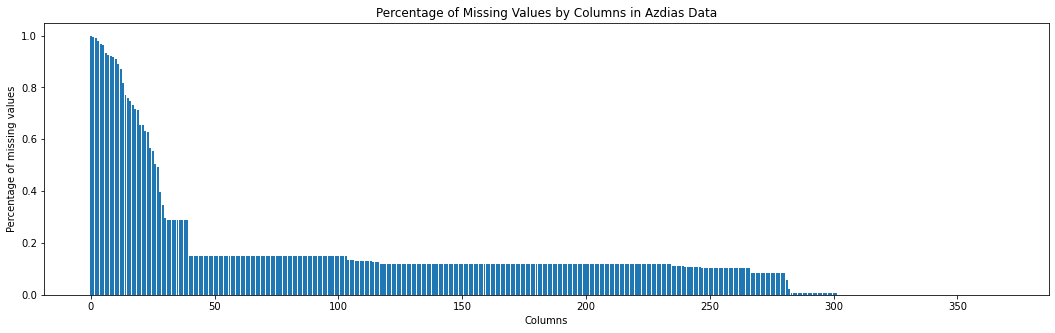

In [43]:
# Show missing percentage of columns in bar plot 
x = np.arange(azdias.shape[1])
y = azdias.isnull().mean().sort_values(ascending = False)
plt.figure(figsize = (18,5))
plt.bar(x,y)
plt.xlabel("Columns")
plt.ylabel("Percentage of missing values")
plt.title("Percentage of Missing Values by Columns in Azdias Data");

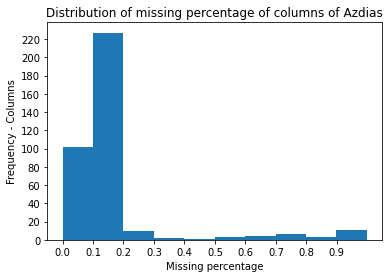

In [44]:
# Distribution of missing percentage
x = azdias.isnull().mean()
plt.hist(x,bins = 10)
plt.yticks(np.arange(0,240,20))
plt.xticks(np.arange(0,1,0.1))
plt.xlabel("Missing percentage")
plt.ylabel("Frequency - Columns")
plt.title("Distribution of missing percentage of columns of Azdias");

From above, we can say that,almost:<br>
* 100 columns have less than 0.1% missing value,
* 220 columns have less than 0.2% missing value,
* Rest of the colums have more than 0.2% missing value.<br>
I will drop the columns have more than 0.2% missing value. I would like to know that how many columns exactly to be dropped.

In [45]:
print("We have {} colums having missing value more than 0.2%"\
      .format(len(azdias.isnull().mean()[azdias.isnull().mean()>0.2])))
print("------------------------------------------------------------")

# Columns to drop
cols_to_drop = azdias.isnull().mean().sort_values()[azdias.isnull().mean()>0.2].index.tolist()

# Append "LNR" ; it has ID's specific for customers, azdias.LNR.nunique() == azdias.shape[0]
cols_to_drop.append("LNR")

# Append "EINGEFUEGT_AM"; three colums had been derived from it before; not need it
cols_to_drop.append("EINGEFUEGT_AM")

print(cols_to_drop)

We have 40 colums having missing value more than 0.2%
------------------------------------------------------------
['D19_VERSI_ONLINE_QUOTE_12', 'D19_VERSAND_ONLINE_QUOTE_12', 'D19_BANKEN_ONLINE_QUOTE_12', 'D19_TELKO_ONLINE_QUOTE_12', 'D19_LOTTO', 'D19_SOZIALES', 'D19_LETZTER_KAUF_BRANCHE', 'D19_KONSUMTYP', 'D19_GESAMT_ONLINE_QUOTE_12', 'ALTERSKATEGORIE_FEIN', 'ALTER_HH', 'D19_GESAMT_DATUM', 'D19_VERSAND_DATUM', 'D19_GESAMT_ONLINE_DATUM', 'D19_VERSAND_ONLINE_DATUM', 'D19_GESAMT_ANZ_24', 'D19_GESAMT_OFFLINE_DATUM', 'D19_VERSAND_ANZ_24', 'KK_KUNDENTYP', 'D19_GESAMT_ANZ_12', 'D19_VERSAND_OFFLINE_DATUM', 'D19_VERSAND_ANZ_12', 'EXTSEL992', 'D19_TELKO_DATUM', 'D19_BANKEN_DATUM', 'AGER_TYP', 'D19_BANKEN_ONLINE_DATUM', 'D19_VERSI_ANZ_24', 'D19_BANKEN_ANZ_24', 'ALTER_KIND1', 'D19_TELKO_OFFLINE_DATUM', 'D19_VERSI_ANZ_12', 'D19_TELKO_ANZ_24', 'D19_BANKEN_ANZ_12', 'D19_TELKO_ANZ_12', 'ALTER_KIND2', 'D19_BANKEN_OFFLINE_DATUM', 'D19_TELKO_ONLINE_DATUM', 'ALTER_KIND3', 'ALTER_KIND4', 'LNR', 'EINGEFUE

In [46]:
# Drop columns from Azdias
azdias.drop(cols_to_drop, axis = 1 , inplace = True)

print("Now, there are {} columns in Azdias!".format(azdias.shape[1]))

Now, there are 327 columns in Azdias!


#### 2.3.2 Handle Missing Data in Rows

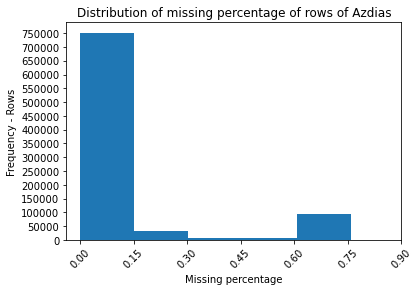

In [47]:
# Distribution of missing percentage of Rows
x = azdias.isnull().mean(axis=1)
plt.hist(x,bins = 5)
plt.yticks(np.arange(0,800000,50000))
plt.xticks(np.arange(0,1,0.15), rotation =45)
plt.xlabel("Missing percentage")
plt.ylabel("Frequency - Rows")
plt.title("Distribution of missing percentage of rows of Azdias");

Almost;<br>
* 750000 rows have missing values with less than 0.15%.
* Rest of the rows have missing values more than 0.15%.
* I will drop the rows that have missings more than 0.15%.

In [48]:
# Drop missing rows from Azdias

print("{} rows have missing values more than 0.15% and will be dropped!"\
      .format(azdias.isnull().mean(axis=1)[azdias.isnull().mean(axis=1)>0.15].shape[0]))

# Create indexes of rows to be dropped
rows_to_drop = azdias.isnull().mean(axis=1)[azdias.isnull().mean(axis=1)>0.15].index

# Drop rows
azdias.drop(rows_to_drop, axis = 0, inplace = True)

print("Now, there are {} rows in Azdias!".format(azdias.shape[0]))

139890 rows have missing values more than 0.15% and will be dropped!
Now, there are 751331 rows in Azdias!


#### 2.3.3 Imputation of Missing Values

* I will fill missing values with:
- most frequent value in categorical (nominal and ordinal) columns,<br>
- mean in numericals

In [49]:
# Update the list of categorical columns, by removing dropped columns from list
print("Count of categoricals before update:", len(categoricals))
categoricals = list(set.intersection(set(azdias.columns.tolist()), set(categoricals)))
print("Count of categoricals after update:", len(categoricals))


# Update the list of ordinal columns, by removing dropped columns from list
print("Count of ordinals before update:", len(ordinals))
ordinals = list(set.intersection(set(azdias.columns.tolist()), set(ordinals)))
print("Count of ordinals after update:", len(ordinals))


# Update the list of numerical columns, by removing dropped columns from list
print("Count of numericals before update:", len(numericals))
numericals = list(set.intersection(set(azdias.columns.tolist()), set(numericals)))
print("Count of numericals after update:", len(numericals))

Count of categoricals before update: 55
Count of categoricals after update: 48
Count of ordinals before update: 296
Count of ordinals after update: 264
Count of numericals before update: 17
Count of numericals after update: 15


In [50]:
# For categorical columns: Fill missings with most frequent value
for col in categoricals:
    azdias[col] = azdias[col].fillna(azdias[col].value_counts().index[0])

# For ordinal columns: Fill missings with most frequent value
for col in ordinals:
    azdias[col] = azdias[col].fillna(azdias[col].value_counts().index[0])  
    
# For numerical columns: Fill missings with mean
for col in numericals:
    azdias[col] = azdias[col].fillna(azdias[col].mean())

In [51]:
# Check the nulls
print("We have {} nulls in categorical columns of Azdias"\
      .format((azdias[categoricals].isnull().mean()>0).sum()))

print("We have {} nulls in numerical columns of Azdias"\
      .format((azdias[numericals].isnull().mean()>0).sum()))

print("We have {} nulls in ordinal columns of Azdias"\
      .format((azdias[ordinals].isnull().mean()>0).sum()))


We have 0 nulls in categorical columns of Azdias
We have 0 nulls in numerical columns of Azdias
We have 0 nulls in ordinal columns of Azdias


### 2.4 Handling Outliers

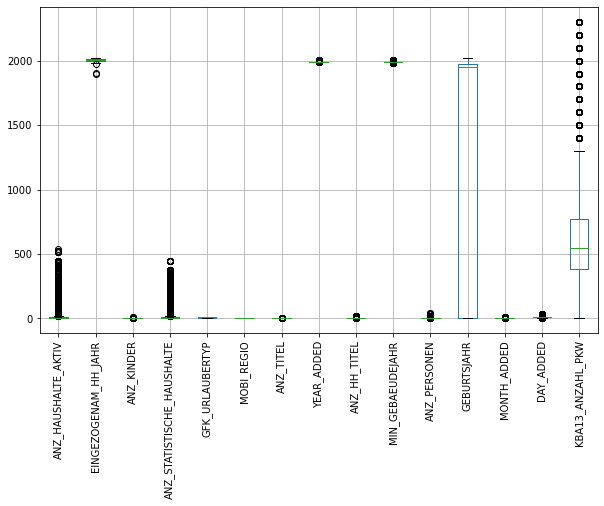

In [52]:
# Glance at numerical variables
azdias[numericals].boxplot(rot = 90, figsize =(10,6));

In [53]:
def detect_outliers(df,features_of_df):
    
    '''
    input --> df : Data frame of which colums to be investigated
              features_of_df : List of column names in which outliers to be investigated
              
    output --> list of row-index of outliers that exist in more than 2 features  
    '''
    
    outlier_indices_list=[]
    
    for each in features_of_df:
        # first quartile Q1
        Q1 = np.percentile(df[[each]], 25)
        # third quartile Q3
        Q3 = np.percentile(df[[each]], 75)
        # IQR = Q3 - Q1
        IQR = Q3 - Q1
        # outlier step = IQR x 1.5
        outlier_step = IQR*1.5
        # outliers = Q1 - outlier step or Q3 + outlier_step 
        outliers = (df[each] < Q1 - outlier_step) |(df[each]>Q3 + outlier_step) 
        # detect indeces of outliers in features of df
        outlier_indices= df[outliers].index
        # store indices
        outlier_indices_list.extend(outlier_indices)
    outlier_indices = Counter(outlier_indices_list)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    return multiple_outliers

In [54]:
# Find outliers for three columns
outliers_index = detect_outliers(azdias,['ANZ_HAUSHALTE_AKTIV','ANZ_STATISTISCHE_HAUSHALTE','KBA13_ANZAHL_PKW'])
print("There are {} rows where outliers exist for three columns!".format(len(outliers_index)))

There are 1047 rows where outliers exist for three columns!


In [55]:
# Drop outliers
print("There are {} rows before dropping outliers!".format(azdias.shape[0]))
azdias = azdias.drop(outliers_index, axis = 0)
print("There are {} rows after dropping outliers!".format(azdias.shape[0]))

There are 751331 rows before dropping outliers!
There are 750284 rows after dropping outliers!


### 2.5 Feature Encoding

Previously i categorized all columns, according to data types, into three categories:
* Categorical, Numerical and Ordinal <br>
For numerical columns, i will keep them as they are.<br>
For categorical columns, i will make dummy encoding.<br>
For ordinal columns, i will keep them as they are.

In [56]:
# Create dummy variables for categorical columns
azdias = pd.get_dummies(azdias, columns = categoricals, drop_first = True )

In [57]:
print("After dummy encoding; Azdias have {} columns!"\
      .format(azdias.shape[1]))

After dummy encoding; Azdias have 615 columns!


### 2.6 Define a function to clean Customer data

In [116]:
def clean_df(df, unknowns, cols_to_drop, categoricals, ordinals, numericals):
    
    # Converting to date time object
    df["EINGEFUEGT_AM"] =  pd.to_datetime(df["EINGEFUEGT_AM"], infer_datetime_format=True)
    
    # Create column "YEAR_ADDED", "MONTH_ADDEDD","DAY_ADDED" columns; i will drop "EINGEFUEGT_AM" later
    df["YEAR_ADDED"] = df["EINGEFUEGT_AM"].dt.year
    df["MONTH_ADDED"] = df["EINGEFUEGT_AM"].dt.month
    df["DAY_ADDED"] = df["EINGEFUEGT_AM"].dt.day
    
    # Replace "XX" with NaN
    df.CAMEO_INTL_2015 = df.CAMEO_INTL_2015.replace("XX", np.NaN)
    
    # Convert data type to float of CAMEO_INTL_2015    
    df["CAMEO_INTL_2015"] = df["CAMEO_INTL_2015"].astype(float)  

    
    
    # Replace "X" and "XX" with NaN in columns "CAMEO_DEUG_2015","CAMEO_DEU_2015"
    df.CAMEO_DEUG_2015 = df.CAMEO_DEUG_2015.replace("X", np.NaN)
    df.CAMEO_DEU_2015 = df.CAMEO_DEU_2015.replace("XX", np.NaN)
    
    # Conver data type
    df.CAMEO_DEUG_2015 = df.CAMEO_DEUG_2015.astype(float)
    
    # Replace "W" and "O" with 0 and 1.
    df.OST_WEST_KZ = df.OST_WEST_KZ.replace("W", 0).replace("O",1)
    
    # Replace values with numbers in CAMEO_DEU_2015
    # Create dictionary to store values
    map_dict = dict()
    k = 0
    for each in df.CAMEO_DEU_2015.value_counts().index.sort_values().tolist():
        map_dict[each]= k
        k = k + 1

    # Replace    
    df["CAMEO_DEU_2015"] = df["CAMEO_DEU_2015"].replace(map_dict) 
        
    # Loop through azdias dataframe and replace necessary values with NaN
    # Loop in attributes that have unknowns
    for attribute in unknowns.Attribute.unique():
        # Loop in unkown values
        for value in unknowns[unknowns.Attribute == attribute].Value.values.tolist():
            # get indices
            idx = df.loc[:,attribute] == value
            # replace with NaN
            df.loc[idx,attribute] = np.NaN 

    
    # Drop columns from df
    df.drop(cols_to_drop, axis = 1 , inplace = True)
    print("{} columns are dropped!".format(len(cols_to_drop)))
    
    # Create indexes of rows to be dropped
    rows_to_drop = df.isnull().mean(axis=1)[df.isnull().mean(axis=1)>0.15].index
    
    # Drop rows
    df.drop(rows_to_drop, axis = 0, inplace = True)
    print("{} rows are dropped!".format(len(rows_to_drop)))
    
   
    # For categorical columns: Fill missings with most frequent value
    for col in categoricals:
        df[col] = df[col].fillna(df[col].value_counts().index[0])

    # For ordinal columns: Fill missings with most frequent value
    for col in ordinals:
        df[col] = df[col].fillna(df[col].value_counts().index[0])  

    # For numerical columns: Fill missings with mean
    for col in numericals:
        df[col] = df[col].fillna(df[col].mean())    
        
    # Find outliers for three columns
    outliers_index = detect_outliers(df,['ANZ_HAUSHALTE_AKTIV','ANZ_STATISTISCHE_HAUSHALTE','KBA13_ANZAHL_PKW'])
    
    # Drop outliers
    df = df.drop(outliers_index, axis = 0)
    print("{} rows of outliers are dropped!".format(len(outliers_index)))
    
    # Create dummy variables for categorical columns
    df = pd.get_dummies(df, columns = categoricals, drop_first = True )
    print("{} columns are dummy-encoded!".format(len(categoricals)))
    
    print("Final data has {} rows and {} colums!".format(df.shape[0], df.shape[1]))
    
    return df

In [59]:
# Clean the Customer data frame
customers = clean_df(customers, unknowns, cols_to_drop, categoricals, ordinals, numericals)

In [60]:
# Check if the nulls handled in Customers
customers.isnull().mean().sum() > 0

False

In [61]:
# Check the number of columns
(azdias.shape[1], customers.shape[1])

(615, 613)

In [62]:
col_difference = list(set.difference(set(azdias.columns.tolist()), set(customers.columns.tolist())))
print("Columns exist in Azdias but not exist in Customers: {}".format(col_difference))

Columns exist in Azdias but not exist in Customers: ['GEBAEUDETYP_5.0', 'TITEL_KZ_2.0']


In [63]:
# Drop the different columns from Azdias
azdias.drop(col_difference, axis = 1, inplace = True)

### 2.7 Feature Scaling of Azdias and Customer Data

In [64]:
# Apply scaling to Azdias data frame
scaler = StandardScaler()
azdias_scaled = pd.DataFrame(scaler.fit_transform(azdias), columns = azdias.columns)

In [65]:
# Apply scaling to Customers data frame
customers_scaled = pd.DataFrame(scaler.fit_transform(customers), columns = customers.columns)

In [66]:
azdias_scaled.head()

,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_KINDER,ANZ_PERSONEN,ANZ_STATISTISCHE_HAUSHALTE,ANZ_TITEL,ARBEIT,BALLRAUM,CAMEO_DEUG_2015,D19_BANKEN_DIREKT,...,CJT_KATALOGNUTZER_2.0,CJT_KATALOGNUTZER_3.0,CJT_KATALOGNUTZER_4.0,CJT_KATALOGNUTZER_5.0,UMFELD_ALT_2.0,UMFELD_ALT_3.0,UMFELD_ALT_4.0,UMFELD_ALT_5.0,HEALTH_TYP_2.0,HEALTH_TYP_3.0
0,0.164806,-0.128564,-0.296945,0.233102,0.299032,-0.060641,-0.190917,0.851585,0.959614,-0.463353,...,-0.380336,-0.475087,-0.510021,-0.628016,-0.428276,1.653195,-0.645069,-0.433863,-0.760700,1.125754
1,0.100299,-0.128564,-0.296945,-0.627052,-0.051397,-0.060641,-0.190917,-0.975151,-0.645583,-0.463353,...,2.629253,-0.475087,-0.510021,-0.628016,2.334940,-0.604889,-0.645069,-0.433863,-0.760700,1.125754
2,-0.480267,-0.128564,-0.296945,-1.487206,-0.401826,-0.060641,-1.195786,-0.061783,-1.448181,-0.463353,...,-0.380336,2.104876,-0.510021,-0.628016,-0.428276,-0.604889,1.550222,-0.433863,1.314579,-0.888294
3,-0.351253,-0.128564,-0.296945,1.953409,-0.331740,-0.060641,0.813952,-0.975151,0.157015,0.019100,...,-0.380336,2.104876,-0.510021,-0.628016,-0.428276,-0.604889,1.550222,-0.433863,-0.760700,1.125754
4,-0.222238,-0.128564,-0.296945,-0.627052,-0.401826,-0.060641,-1.195786,0.851585,0.959614,-0.463353,...,-0.380336,-0.475087,-0.510021,1.592317,-0.428276,1.653195,-0.645069,-0.433863,-0.760700,1.125754


In [67]:
customers_scaled.head()

,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_KINDER,ANZ_PERSONEN,ANZ_STATISTISCHE_HAUSHALTE,ANZ_TITEL,ARBEIT,BALLRAUM,CAMEO_DEUG_2015,D19_BANKEN_DIREKT,...,CJT_KATALOGNUTZER_2.0,CJT_KATALOGNUTZER_3.0,CJT_KATALOGNUTZER_4.0,CJT_KATALOGNUTZER_5.0,UMFELD_ALT_2.0,UMFELD_ALT_3.0,UMFELD_ALT_4.0,UMFELD_ALT_5.0,HEALTH_TYP_2.0,HEALTH_TYP_3.0
0,-0.279911,-0.128558,-0.264907,-0.203160,-0.263158,-0.134519,-1.818381,-0.611942,-1.40217,-0.426604,...,-0.279164,-0.414208,2.12445,-0.931878,-0.486942,-0.605694,1.876075,-0.404837,-0.839815,-0.624524
1,-0.279911,-0.128558,-0.264907,-0.917164,-0.263158,-0.134519,0.165508,1.277295,0.27563,-0.426604,...,-0.279164,-0.414208,-0.47071,1.073102,-0.486942,-0.605694,-0.533028,-0.404837,1.190739,-0.624524
2,-0.352184,0.000796,-0.264907,-1.631168,-0.263158,-0.134519,-1.818381,1.277295,-0.14382,-0.426604,...,-0.279164,-0.414208,-0.47071,1.073102,-0.486942,1.650998,-0.533028,-0.404837,1.190739,-0.624524
3,0.153723,-0.128558,-0.264907,1.224848,0.174495,-0.134519,0.165508,-0.611942,1.11453,2.089999,...,-0.279164,-0.414208,2.12445,-0.931878,2.053634,-0.605694,-0.533028,-0.404837,-0.839815,1.601221
4,-0.279911,-0.128558,-0.264907,-0.203160,-0.263158,-0.134519,0.165508,1.277295,0.27563,-0.426604,...,-0.279164,2.414246,-0.47071,-0.931878,2.053634,-0.605694,-0.533028,-0.404837,-0.839815,1.601221


#### Dumping Scaled Azdias & Customers data into pickle

In [68]:
#pickle.dump(azdias_scaled, open(r"U:\arvato_data\azdias_scaled.pickle", "wb"))

In [69]:
#pickle.dump(customers_scaled, open(r"U:\arvato_data\customers_scaled.pickle", "wb"))

### 2.8 Cleaning Train and Test Data 

#### 2.8.1 Train Data

In [117]:
# Read the data of Udacity_MAILOUT_052018_TRAIN
train = pd.read_csv(r"U:\arvato_data\Udacity_MAILOUT_052018_TRAIN.csv", 
                     delimiter=";",
                    dtype = {"CAMEO_DEUG_2015": "str","CAMEO_INTL_2015": "str" })

In [118]:
# Shape before cleaning
train.shape

(42962, 367)

In [119]:
# Count of columns to be droppen
len(cols_to_drop)

42

In [120]:
# Check if there is any row having null
len(train.isnull().mean(axis=1)[train.isnull().mean(axis=1)>0.15].index)

8748

In [121]:
# Check if there is any column having at least 1 null (There is not)
len(train.isnull().mean(axis=0)[train.isnull().mean(axis=0)>0].index)

273

In [122]:
# Find outliers for three columns, count of rows to be dropped
len(detect_outliers(train,['ANZ_HAUSHALTE_AKTIV','ANZ_STATISTISCHE_HAUSHALTE','KBA13_ANZAHL_PKW']))

0

In [123]:
# Clean train data and encode
train_cleaned = clean_df(train, unknowns, cols_to_drop, categoricals, ordinals, numericals)

42 columns are dropped!
8748 rows are dropped!
49 rows of outliers are dropped!
48 columns are dummy-encoded!
Final data has 34165 rows and 614 colums!


In [131]:
# Check null in cleaned data
(train_cleaned.isnull().sum()>0).sum()

0

In [124]:
train_cleaned.RESPONSE.value_counts()

0    33742
1      423
Name: RESPONSE, dtype: int64

#### 2.8.2 Test Data

In [134]:
# Update Clean Function for test data: I dont want to drop any rows

def clean_df_test(df, unknowns, cols_to_drop, categoricals, ordinals, numericals):
    
    # Converting to date time object
    df["EINGEFUEGT_AM"] =  pd.to_datetime(df["EINGEFUEGT_AM"], infer_datetime_format=True)
    
    # Create column "YEAR_ADDED", "MONTH_ADDEDD","DAY_ADDED" columns; i will drop "EINGEFUEGT_AM" later
    df["YEAR_ADDED"] = df["EINGEFUEGT_AM"].dt.year
    df["MONTH_ADDED"] = df["EINGEFUEGT_AM"].dt.month
    df["DAY_ADDED"] = df["EINGEFUEGT_AM"].dt.day
    
    # Replace "XX" with NaN
    df.CAMEO_INTL_2015 = df.CAMEO_INTL_2015.replace("XX", np.NaN)
    
    # Convert data type to float of CAMEO_INTL_2015    
    df["CAMEO_INTL_2015"] = df["CAMEO_INTL_2015"].astype(float)  

    
    
    # Replace "X" and "XX" with NaN in columns "CAMEO_DEUG_2015","CAMEO_DEU_2015"
    df.CAMEO_DEUG_2015 = df.CAMEO_DEUG_2015.replace("X", np.NaN)
    df.CAMEO_DEU_2015 = df.CAMEO_DEU_2015.replace("XX", np.NaN)
    
    # Conver data type
    df.CAMEO_DEUG_2015 = df.CAMEO_DEUG_2015.astype(float)
    
    # Replace "W" and "O" with 0 and 1.
    df.OST_WEST_KZ = df.OST_WEST_KZ.replace("W", 0).replace("O",1)
    
    # Replace values with numbers in CAMEO_DEU_2015
    # Create dictionary to store values
    map_dict = dict()
    k = 0
    for each in df.CAMEO_DEU_2015.value_counts().index.sort_values().tolist():
        map_dict[each]= k
        k = k + 1

    # Replace    
    df["CAMEO_DEU_2015"] = df["CAMEO_DEU_2015"].replace(map_dict) 
        
    # Loop through azdias dataframe and replace necessary values with NaN
    # Loop in attributes that have unknowns
    for attribute in unknowns.Attribute.unique():
        # Loop in unkown values
        for value in unknowns[unknowns.Attribute == attribute].Value.values.tolist():
            # get indices
            idx = df.loc[:,attribute] == value
            # replace with NaN
            df.loc[idx,attribute] = np.NaN 

    
    # Drop columns from df
    df.drop(cols_to_drop, axis = 1 , inplace = True)
    print("{} columns are dropped!".format(len(cols_to_drop)))
    
    # Create indexes of rows to be dropped
    #rows_to_drop = df.isnull().mean(axis=1)[df.isnull().mean(axis=1)>0.15].index
    
    # Drop rows
    #df.drop(rows_to_drop, axis = 0, inplace = True)
    #print("{} rows are dropped!".format(len(rows_to_drop)))
    
   
    # For categorical columns: Fill missings with most frequent value
    for col in categoricals:
        df[col] = df[col].fillna(df[col].value_counts().index[0])

    # For ordinal columns: Fill missings with most frequent value
    for col in ordinals:
        df[col] = df[col].fillna(df[col].value_counts().index[0])  

    # For numerical columns: Fill missings with mean
    for col in numericals:
        df[col] = df[col].fillna(df[col].mean())    
        
    # Find outliers for three columns
    #outliers_index = detect_outliers(df,['ANZ_HAUSHALTE_AKTIV','ANZ_STATISTISCHE_HAUSHALTE','KBA13_ANZAHL_PKW'])
    
    # Drop outliers
    #df = df.drop(outliers_index, axis = 0)
    #print("{} rows of outliers are dropped!".format(len(outliers_index)))
    
    # Create dummy variables for categorical columns
    df = pd.get_dummies(df, columns = categoricals, drop_first = True )
    print("{} columns are dummy-encoded!".format(len(categoricals)))
    
    print("Final data has {} rows and {} colums!".format(df.shape[0], df.shape[1]))
    
    return df

In [132]:
# Read the data of Udacity_MAILOUT_052018_TEST.csv
test = pd.read_csv(r"U:\arvato_data\Udacity_MAILOUT_052018_TEST.csv", 
                     delimiter=";",
                    dtype = {"CAMEO_DEUG_2015": "str","CAMEO_INTL_2015": "str" })

In [136]:
# Shape before cleaning
test.shape

(42833, 366)

In [137]:
# Clean test data
test_cleaned = clean_df_test(test, unknowns, cols_to_drop, categoricals, ordinals, numericals)

42 columns are dropped!
48 columns are dummy-encoded!
Final data has 42833 rows and 613 colums!


Check the column differences between final train and test data

In [138]:
set.difference(set(train_cleaned.columns), set(test_cleaned.columns))

{'RESPONSE'}

#### Dump cleaned and encoded data into pickle

In [140]:
pickle.dump(train_cleaned, open(r"U:\arvato_data\train_cleaned.pickle", "wb"))

In [141]:
pickle.dump(test_cleaned, open(r"U:\arvato_data\test_cleaned.pickle", "wb"))

                                          Notebook Continues with the "3. Part 1: Customer Segmentation Report"--->